<div style="padding-bottom: 20px;"><a href='https://www.ppmi-info.org/'><img src='http://mitocanada.org/wp-content/uploads/2016/09/PPMI-logo.jpg' width='180px' style='float: left; padding-right: 20px;'></a><h1 style='display: inline;'>Parkinson's Progression Markers Initiative Data Visualization</h1></div>

<hr style="border-color: #F7A80D;margin-top: 30px;">

<div style="text-align: justify"><p><a href="https://www.ppmi-info.org">The Parkinson's Progression Markers Initiative (PPMI)</a> study is sponsored by the <a href="https://www.michaeljfox.org/">Michael J Fox Foundation</a> and takes place in 35 different research centers in North-America, Europe, Israël and Australia. This 13 years long study aims to identify clinical, imaging and biologic markers of PD progression for use in clinical trials of disease-modifying therapies.</p>


<p>The goal of this notebook is to highlight some of the data set's features with an emphasis on future machine learning development based on DTI images.</p></div>

<hr style="border-color: #F7A80D;">

<h2>Study Quick Stats</h2>
<ul>
    <li><b>35 research centers</b> involved;</li>
    <li><b>5 years</b> longitudinal study;</li>
    <li><b>2000 subjects</b> enrolled including <b>400 PD patients</b> and <b>200 controls</b>;</li>
    <li><b>Multiple clinical markers</b> such as: <i>Cognition</i>, <i>Behavioral</i>, <i>Autonomic</i>, <i>Olfaction</i>, <i>Sleep</i>, <i>Motor Analysis</i> and <i>Speech</i>;</li>
    <li><b>Multiple imaging modalities</b> including: <i>SPECT/PET</i>, <i>Amyloid</i>, <i>MRI-DTI</i> and <i>rsMRI</i>;</li>
    <li>Parkinson's progression measured based on the <b><a href="https://en.wikipedia.org/wiki/Hoehn_and_Yahr_scale">Hoehn and Yahr scale</a></b>;</li>
    <li><b>72 CSVs</b> describing the data.</li>
</ul>

<h2>DTI Sub-Study</h2>

> The DTI study is a sub-study of PPMI. Thus, the number of subjects involved in this sub-study varies from the original PPMI study.

<ul>
    <li><b>8 research centers</b> involved;</li>
    <li><b>170 PD patients</b> including  <b>107 males</b> and <b>63 females</b> of <b>61.37 years old</b> on average;</li>
    <li><b>76 controls</b> including <b>48 males</b> and <b>28 females</b> of <b>60.63 years old</b> on average;</li>
</ul>

<hr style="border-color: #F7A80D;">
<center><a href="http://www.ppmi-info.org/wp-content/uploads/2018/02/PPMI-AM-13-Protocol.pdf"><h2>Complete study design available here !</h2></a></center>

In [1]:
import os
import nrrd
import numpy as np
import pandas as pd
import seaborn as sb
import nibabel as nib
import scipy.linalg as lin
import matplotlib.pyplot as plt

In [2]:
# Defining constants and paths
DATA_PATH = ".\\data"

DTI_FOLDER = "DTI"
T1_MRI_FOLDER = "T1_MRI"

IMAGE_COLLECTION_CHARAC_FOLDER = "image_collection_characteristics"
IMAGE_COLLECTION_CHARAC_FILE = "characteristics.csv"

MEDICAL_HISTORY_FOLDER = "medical_history"
MEDICAL_HISTORY_DIAG_FEATURES_FILE = "Diagnostic_Features.csv"

STUDY_DATA_FOLDER = "study_data"
STUDY_DATA_DATA_DICTIONARY_FILE = "data_dictionary.csv"

MOTOR_ASSESMENT_FOLDER = "motor_assesment"
MOTOR_ASSESMENT_FILE_PART_3 = "MDS_UPDRS_Part_III.csv"

IMAGE_FOLDER = "images/PPMI"

CSV_SEPARATOR = ";"

In [3]:
# Reading the image collection subject characteristics
image_collection_dti_charac_df = pd.read_csv(os.path.join(
    DATA_PATH,
    IMAGE_COLLECTION_CHARAC_FOLDER,
    DTI_FOLDER,
    IMAGE_COLLECTION_CHARAC_FILE),sep=CSV_SEPARATOR)

# Reading the motor assesment features
motor_assesment_part_3_df = pd.read_csv(os.path.join(
    DATA_PATH,
    MOTOR_ASSESMENT_FOLDER,
    MOTOR_ASSESMENT_FILE_PART_3),sep=CSV_SEPARATOR).rename(columns={"PATNO": "Subject"})

# Reading the diagnostic features
medical_history_diag_features_df = pd.read_csv(os.path.join(
    DATA_PATH,
    MEDICAL_HISTORY_FOLDER,
    MEDICAL_HISTORY_DIAG_FEATURES_FILE),sep=CSV_SEPARATOR).rename(columns={"PATNO": "Subject"})

# Reading the data dictionary
data_dictionary_df = pd.read_csv(os.path.join(
    DATA_PATH,
    STUDY_DATA_FOLDER,
    STUDY_DATA_DATA_DICTIONARY_FILE),sep=CSV_SEPARATOR)

<h1>Subject characteristics exploration and visualization</h1>
<hr style="border-color: #F7A80D;margin-top: 20px;">

This section focus on the **DTI sub-study subjects' caracteristics**. The goal is to have a general idea of the study population based on their **general characteristics (e.g. age, sex, etc.)**.

## Study groups distribution
<hr style="border-color: #F7A80D;margin-top: 20px;">

>There is **170 PD patients** and **76 controls** with DTI baseline. Among them, the is more women than men as shown in the graphs below.

In [4]:
# Show the DTI collection characteristics header
image_collection_dti_charac_df.head(1)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,526412,85242,Prodromal,M,64,1,DTI,DTI Full Tensors-MRI,Processed,2/18/2015,NRRD,NaN


Text(0,0.5,'Nb. of subjects')

<Figure size 432x288 with 0 Axes>

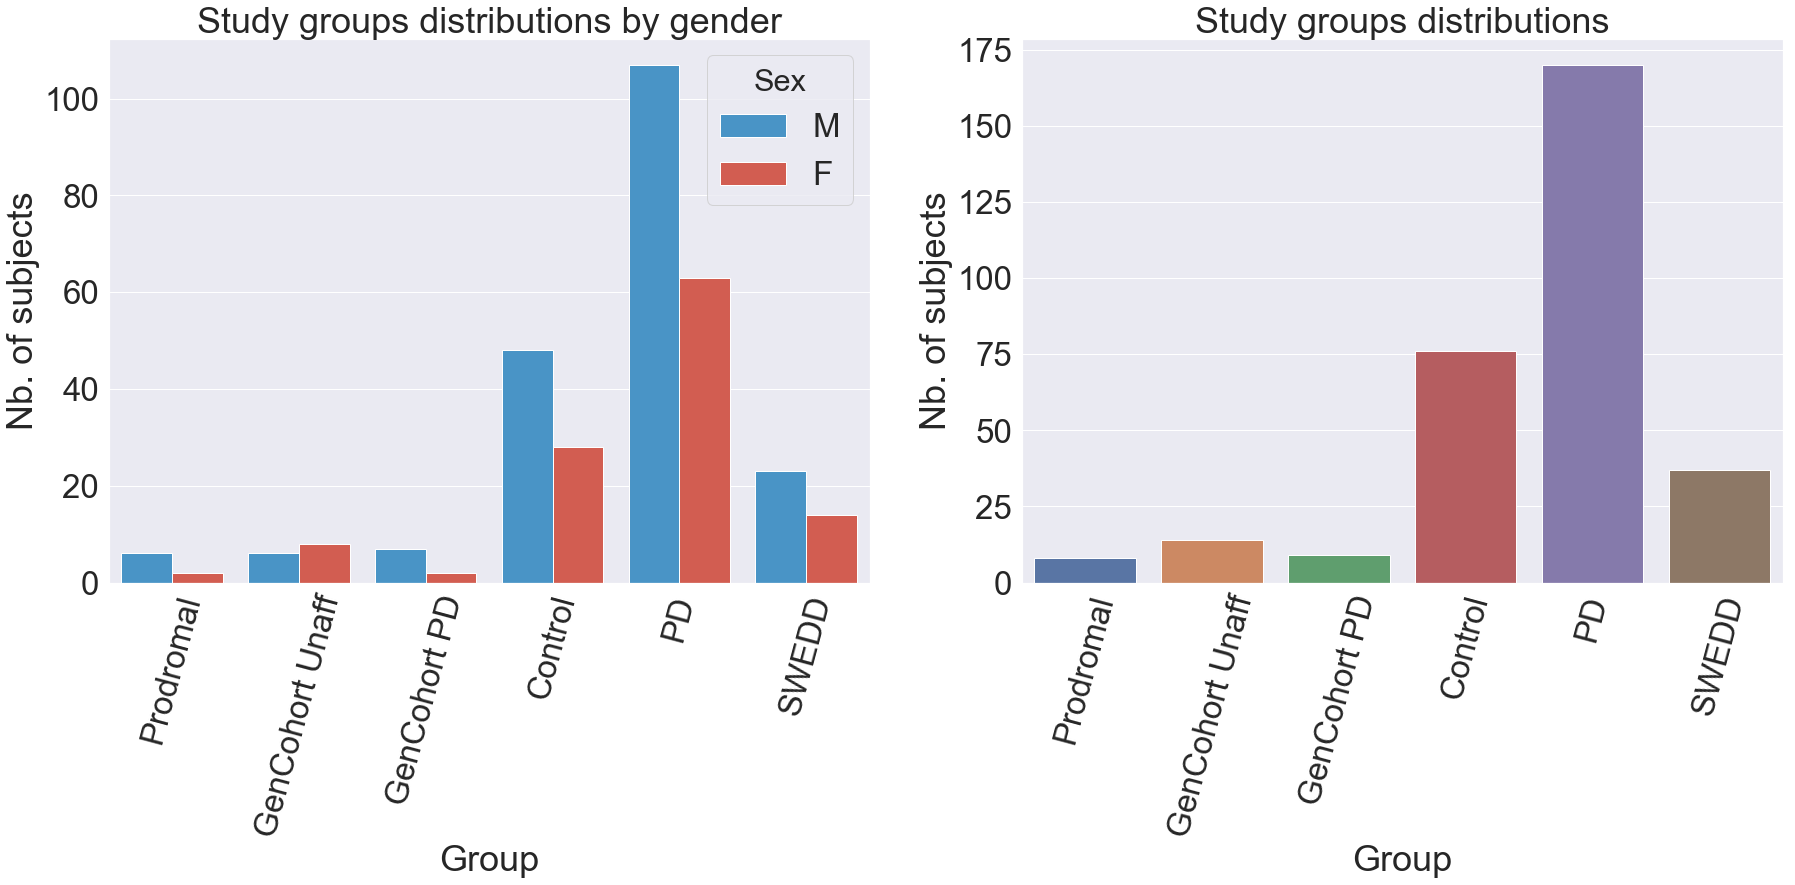

In [79]:
#Plotting the study groups distributions
plt.figure()
sb.set(font_scale=3)
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(30, 10))

ax2.set_title("Study groups distributions")
ax2.tick_params(axis="x", rotation=75)
groups_count = sb.countplot(x="Group", data=image_collection_dti_charac_df,ax=ax2)
groups_count.set_ylabel("Nb. of subjects")

ax.set_title("Study groups distributions by gender")
ax.tick_params(axis="x", rotation=75)
groups_count_by_gender = sb.countplot(x="Group", data=image_collection_dti_charac_df, hue="Sex",palette={'M': "#3498db", 'F': "#e74c3c"},ax=ax)
groups_count_by_gender.set_ylabel("Nb. of subjects")

## Controls and patients age distribution
<hr style="border-color: #F7A80D;margin-top: 20px;">

**Men patients are on average older than women patients.** However, **globally** both patients and controls are **around 60 years old.**

In [6]:
# Defining basic filters
is_healthy_control = image_collection_dti_charac_df["Group"] == "Control"
is_patient = image_collection_dti_charac_df["Group"] == "PD"

is_male = image_collection_dti_charac_df["Sex"] == "M"
is_female = image_collection_dti_charac_df["Sex"] == "F"

<Figure size 432x288 with 0 Axes>

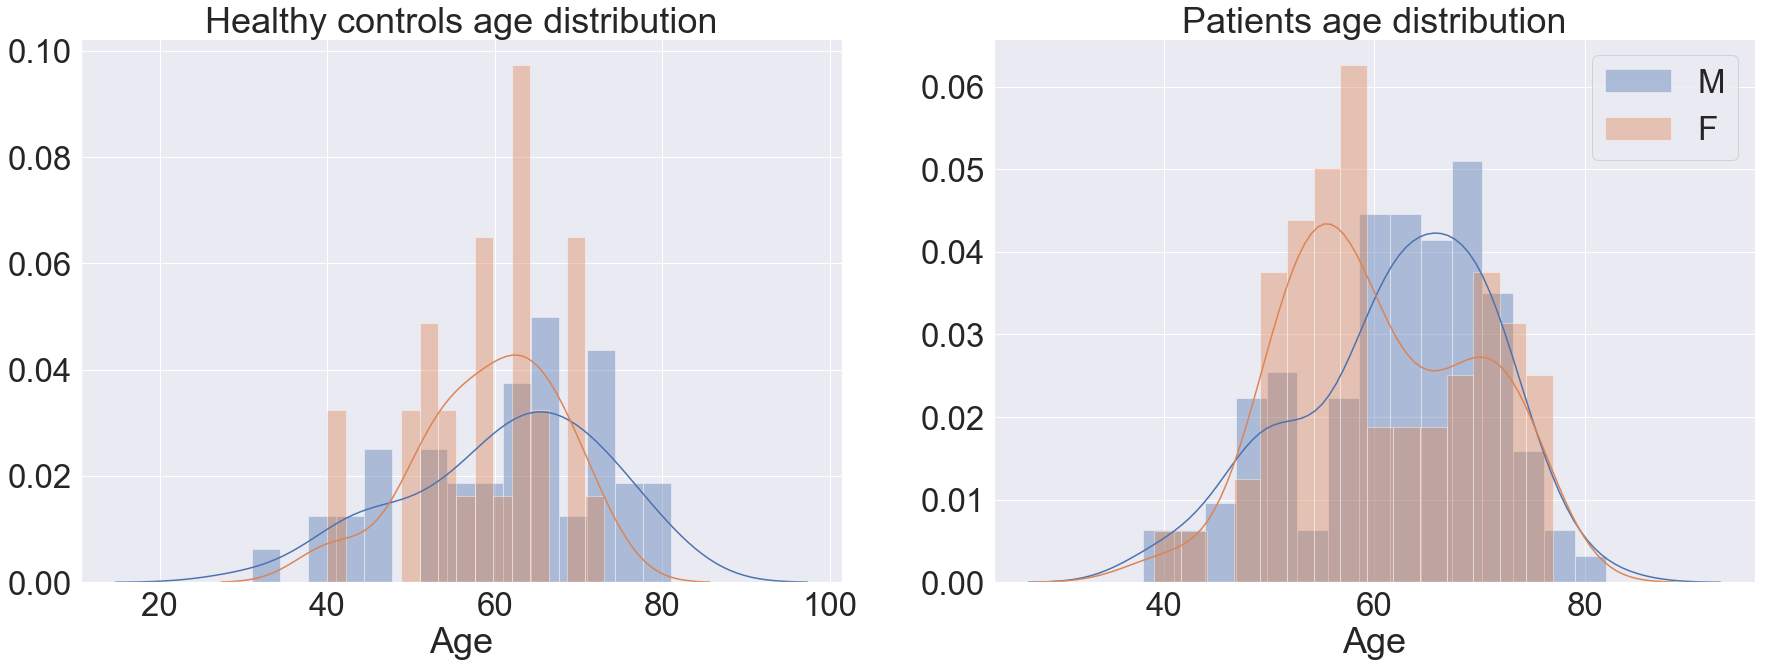

In [80]:
# Plotting the age distribution
plt.figure()
sb.set(font_scale=3)
Xfig, (ax, ax2) = plt.subplots(ncols=2, figsize=(30,10))

ax.set_title("Healthy controls age distribution")
sb.distplot(image_collection_dti_charac_df[is_healthy_control & is_male]['Age'], ax=ax, bins=15, label='M')
sb.distplot(image_collection_dti_charac_df[is_healthy_control & is_female]['Age'], ax=ax, bins=15, label='F')

ax2.set_title("Patients age distribution")
sb.distplot(image_collection_dti_charac_df[is_patient & is_male]['Age'], ax=ax2, bins=15, label='M')
sb.distplot(image_collection_dti_charac_df[is_patient & is_female]['Age'], ax=ax2, bins=15, label='F')
plt.legend()

## Controls and patients diagnostic features
<hr style="border-color: #F7A80D;margin-top: 20px;">

The study provides some **diagnostic features that help in the diagnostic of Parkinson.**

These features includes but are not limited to:

* Resting tremor;
* Axial rigidity;
* Urinary disfunction;
* More ...

In [25]:
# Get the diagnostic features names
comment_features = set(['DFCRSCM', 'DFTREMCM', 'DFRIGCM', 'DFABRCM', 'DFPGCM', 'DFHYPCM'])

diagnostic_features = [feature for feature in medical_history_diag_features_df.columns.values[2:] if feature not in comment_features]

In [60]:
# Defining event filters
is_v04 = medical_history_diag_features_df['EVENT_ID'] == 'V04'
is_v06 = medical_history_diag_features_df['EVENT_ID'] == 'V06'
is_v08 = medical_history_diag_features_df['EVENT_ID'] == 'V08'

In [74]:
# Get the patients and controls diagnostic features data frames
controls_diagnostic_features_df = image_collection_dti_charac_df[is_healthy_control].merge(medical_history_diag_features_df, on="Subject")[diagnostic_features]
v4_patients_diagnostic_features_df = image_collection_dti_charac_df[is_patient].merge(medical_history_diag_features_df[is_v04], on="Subject")[diagnostic_features]
v6_patients_diagnostic_features_df = image_collection_dti_charac_df[is_patient].merge(medical_history_diag_features_df[is_v06], on="Subject")[diagnostic_features]
v8_patients_diagnostic_features_df = image_collection_dti_charac_df[is_patient].merge(medical_history_diag_features_df[is_v08], on="Subject")[diagnostic_features]

<Figure size 432x288 with 0 Axes>

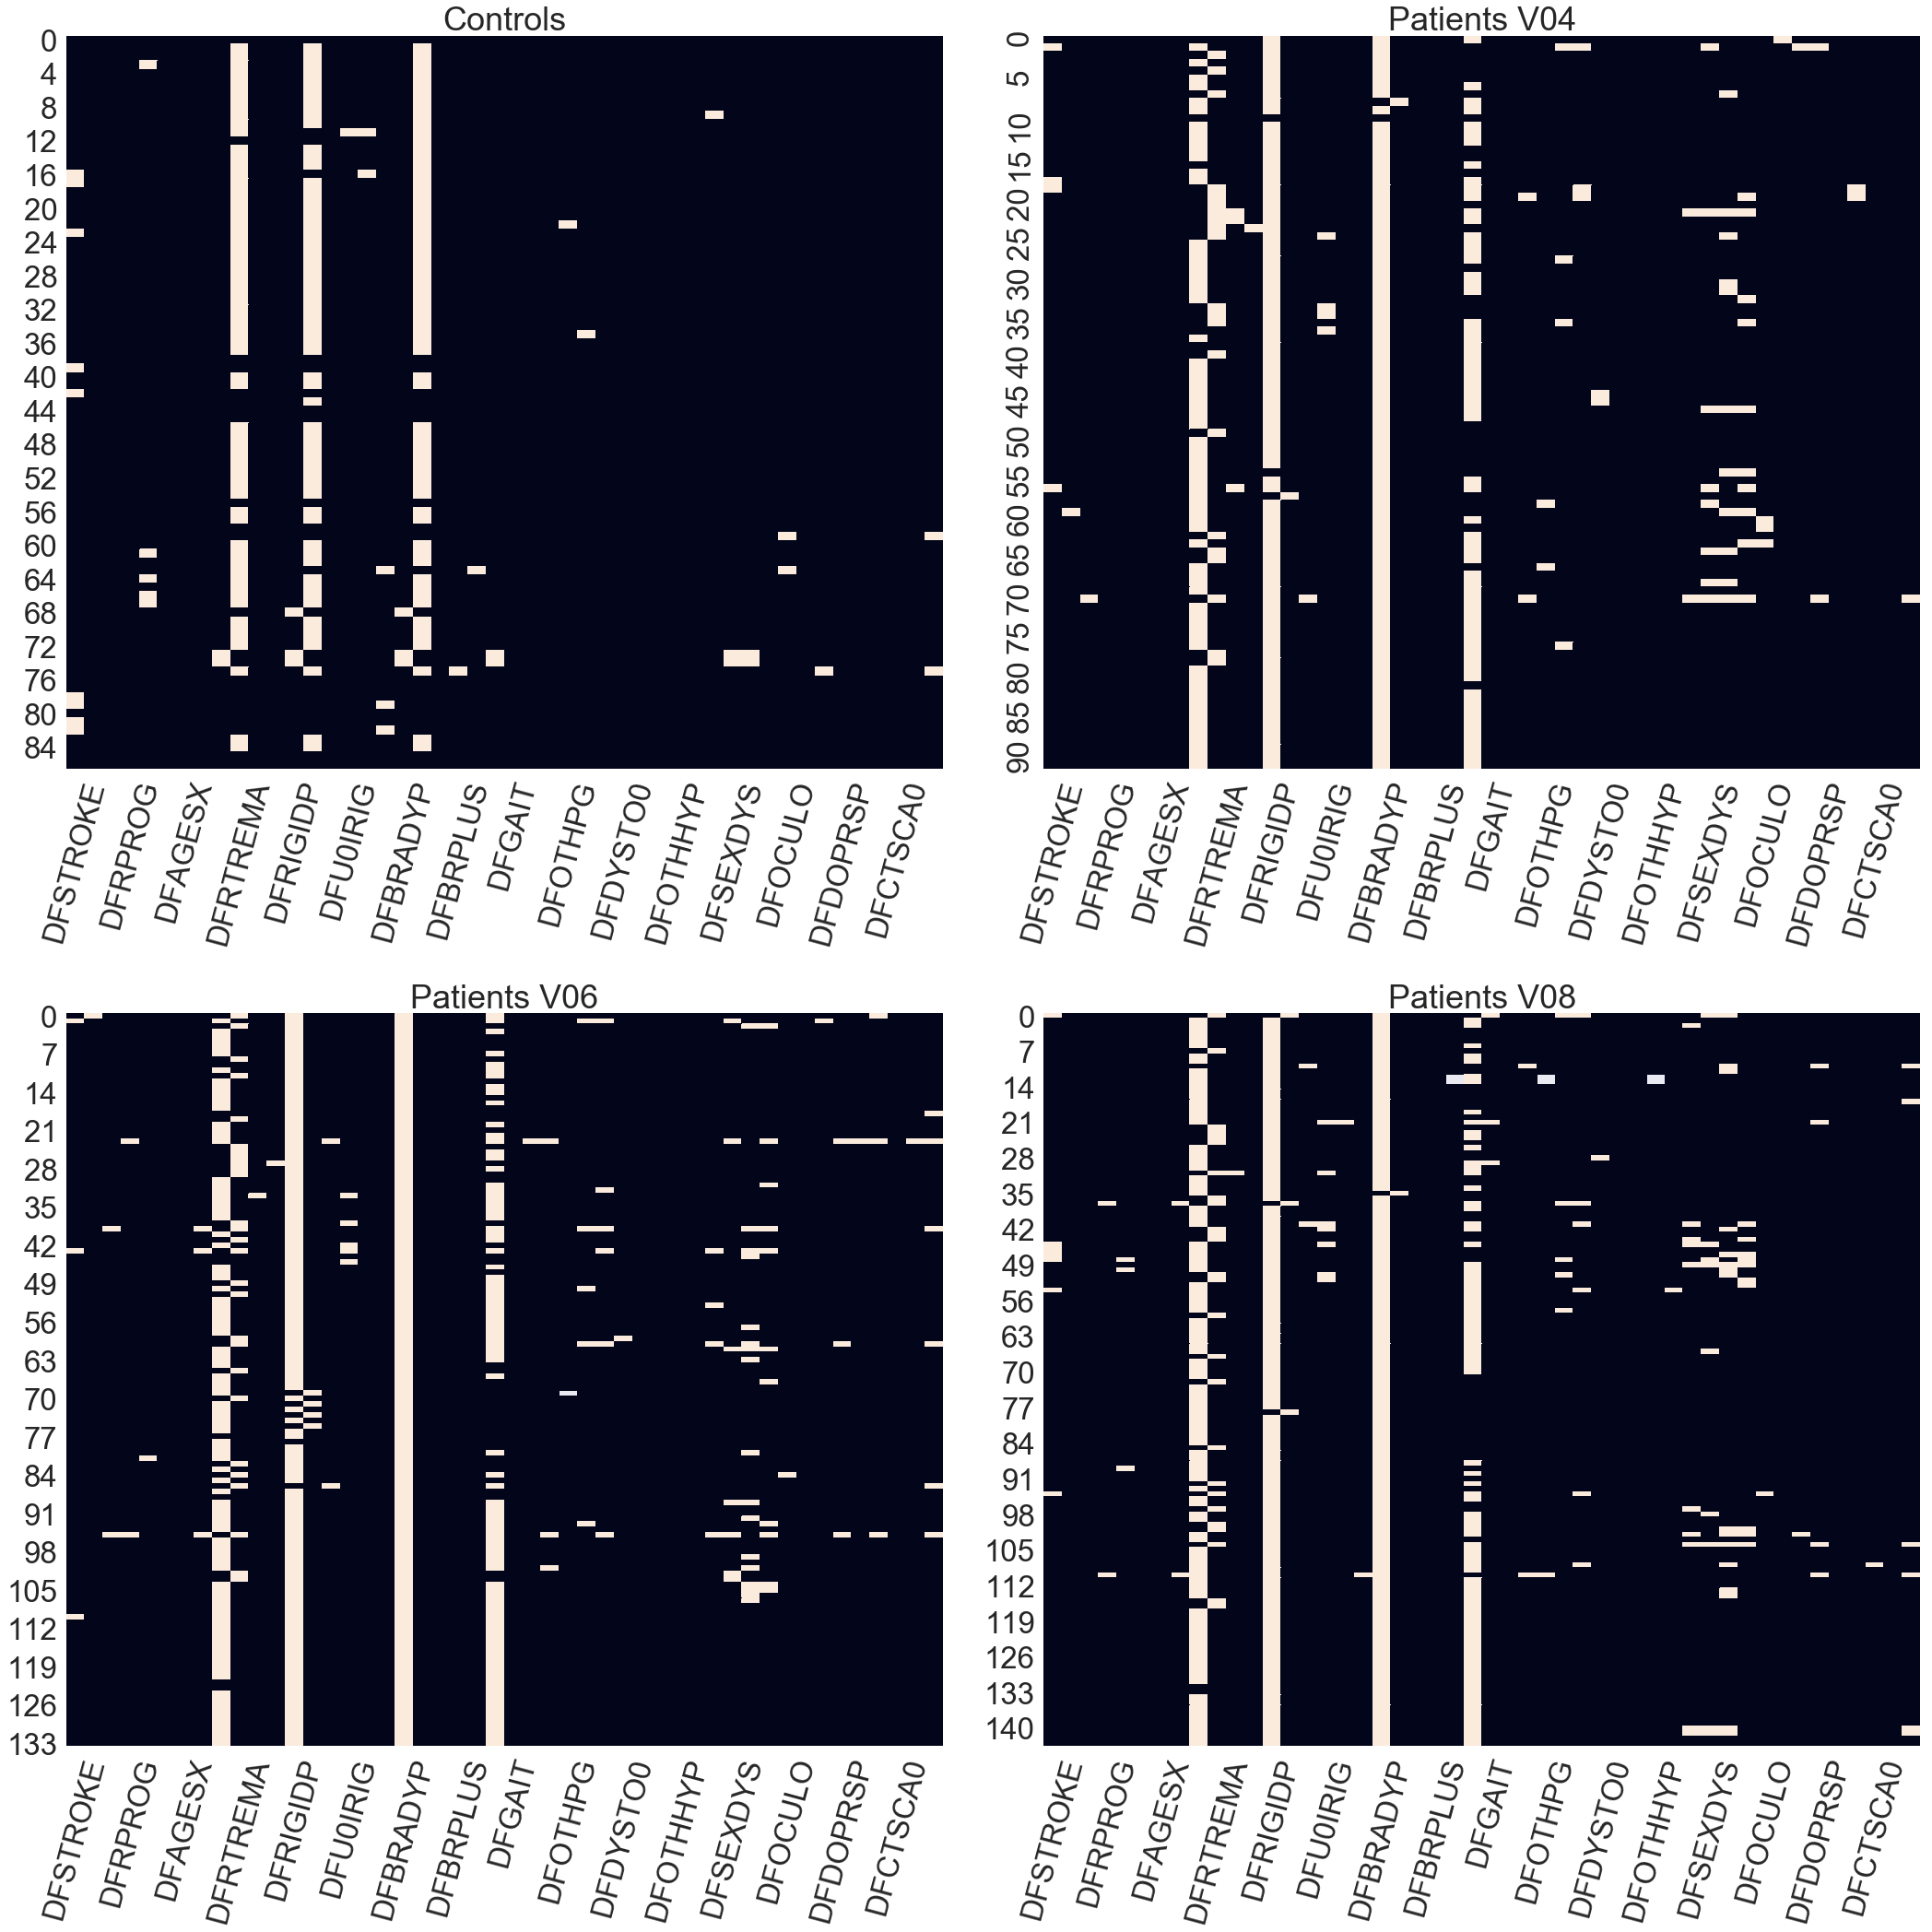

In [87]:
plt.figure()
sb.set(font_scale=3)
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(30, 30))

axs[0,0].set_title("Controls")
control_heatmap = sb.heatmap(
    controls_diagnostic_features_df,
    ax=axs[0,0],
    cbar=False)
axs[0,0].tick_params(axis="x", rotation=75)

axs[0,1].set_title("Patients V04")
patients_heatmap = sb.heatmap(
    v4_patients_diagnostic_features_df.reset_index(drop=True),
    ax=axs[0,1],
    cbar=False)
axs[0,1].tick_params(axis="x", rotation=75)

axs[1,0].set_title("Patients V06")
control_heatmap = sb.heatmap(
    v6_patients_diagnostic_features_df.reset_index(drop=True),
    ax=axs[1,0],
    cbar=False)
axs[1,0].tick_params(axis="x", rotation=75)

axs[1,1].set_title("Patients V08")
patients_heatmap = sb.heatmap(
    v8_patients_diagnostic_features_df.reset_index(drop=True),
    ax=axs[1,1],
    cbar=False)
axs[1,1].tick_params(axis="x", rotation=75)

plt.tight_layout()

# Image visualization
<hr style="border-color: #F7A80D;margin-top: 20px;">

As this project focus on **diffusion imaging**, specifically diffusion tensor imaging, this section will **focus on the available DTI data**.

## Quick stats
* Images are made of **176 slices of 240 x 256 tensors**;
* Tensors are **symetric matrices of 9 values**;
* Due to noise, the **tensors are not strictly positive but has positive eigenvalues**;
* Images are available in **NRRD or NIFTI format**;
* **NRRD and NIFTI format do not ensure exact tensor values for a given 3D position**.

In [93]:
# Loading NRRD and NIFTI image for a given test subject
SUBJECT_ID = "4083"
NRRD_IMAGE_FILE = "PPMI_4083_MR_DTI_Full_Tensors-MRI_Br_20140129162043184_S181396_I411140.nrrd"
NIFTI_IMAGE_FILE = "PPMI_4083_MR_DTI_Full_Tensors-MRI_Br_20140129162043184_S181396_I411140.nii"

nrrd_image, header = nrrd.read(os.path.join(DATA_PATH, IMAGE_FOLDER, SUBJECT_ID, NRRD_IMAGE_FILE))
nifti_image = nib.load(os.path.join(DATA_PATH, IMAGE_FOLDER, SUBJECT_ID, NIFTI_IMAGE_FILE))

## Eigenvalues, eigenvectors and image dimension visualization
<hr style="border-color: #F7A80D;margin-top: 20px;">

In [94]:
# Print an arbitrary tensor values
print("NRRD tensor values:\n {} \n".format(nrrd_image[50][120][100].reshape((3,3))))
print("Nifti tensor values:\n {}".format(nifti_image.get_fdata()[50][120][100].reshape((3,3))))

NRRD tensor values:
 [[ 9.8049769e-04 -4.3928508e-06  2.4044079e-05]
 [-4.3928508e-06  9.1812038e-04  1.6206179e-05]
 [ 2.4044079e-05  1.6206179e-05  8.8660681e-04]] 

Nifti tensor values:
 [[ 9.37655685e-04 -7.89367277e-07 -3.70289345e-05]
 [-7.89367277e-07  8.50094424e-04  1.76704416e-05]
 [-3.70289345e-05  1.76704416e-05  8.71978409e-04]]


In [98]:
(nrrd_eigen_values, nrrd_eigen_vectors) = lin.eig(nrrd_image[50][120][100].reshape((3,3)))
(nifti_eigen_values, nifti_eigen_vector) = lin.eig(nifti_image.get_fdata()[50][120][100].reshape((3,3)))

In [102]:
print("The computed eigenvalues computed from the NRRD image are: {}".format(nrrd_eigen_values))
print("The computed eigenvalues computed from the NIFTI image are: {}".format(nifti_eigen_values))

The computed eigenvalues computed from the NRRD image are: [0.0009863 +0.j 0.00087437+0.j 0.00092456+0.j]
The computed eigenvalues computed from the NIFTI image are: [0.00095493+0.j 0.00086841+0.j 0.00083639+0.j]


In [103]:
print("Image dimension: {}".format(nifti_image.get_fdata().shape))

Image dimension: (176, 240, 256, 9)
